In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/Users/User/Downloads/emotion_classified_reviews.csv")

In [5]:
df.head()

,Id,categories,published_date,user_id,useful,total_of_person,review_score,review_text,emotions
0,0826414346,['Biography & Autobiography'],2005-01-01,A30TK6U7DNS82R,10,10,5.0,I don't care much for Dr. Seuss but after read...,1
1,0826414346,['Biography & Autobiography'],2005-01-01,A3UH4UZ4RSVO82,10,11,5.0,"If people become the books they read and if ""t...",1
2,0826414346,['Biography & Autobiography'],2005-01-01,A2MVUWT453QH61,7,7,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",1
3,0826414346,['Biography & Autobiography'],2005-01-01,A22X4XUPKF66MR,3,3,4.0,Philip Nel - Dr. Seuss: American IconThis is b...,1
4,0826414346,['Biography & Autobiography'],2005-01-01,A2F6NONFUDB6UK,2,2,4.0,"""Dr. Seuss: American Icon"" by Philip Nel is a ...",1


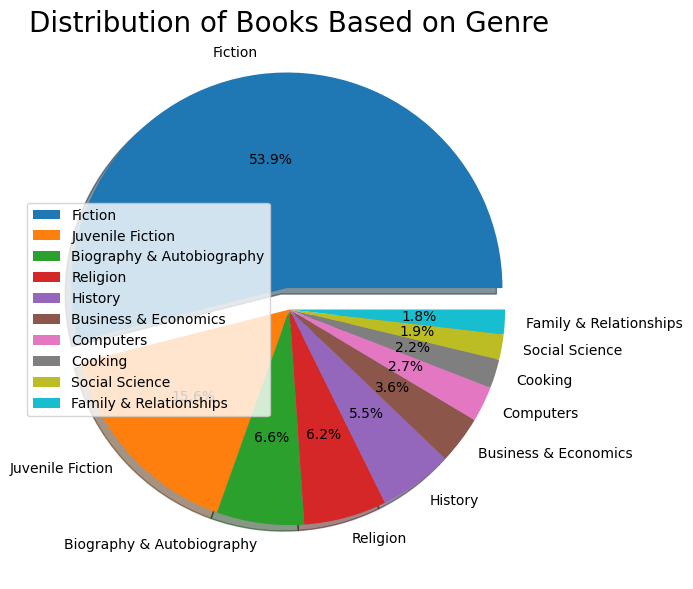

In [14]:
plt.figure(figsize=(7,7))
labels=['Fiction','Juvenile Fiction','Biography & Autobiography','Religion','History','Business & Economics','Computers','Cooking','Social Science','Family & Relationships']
plt.pie(df['categories'].value_counts().head(10),explode=(0.1,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Books Based on Genre', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

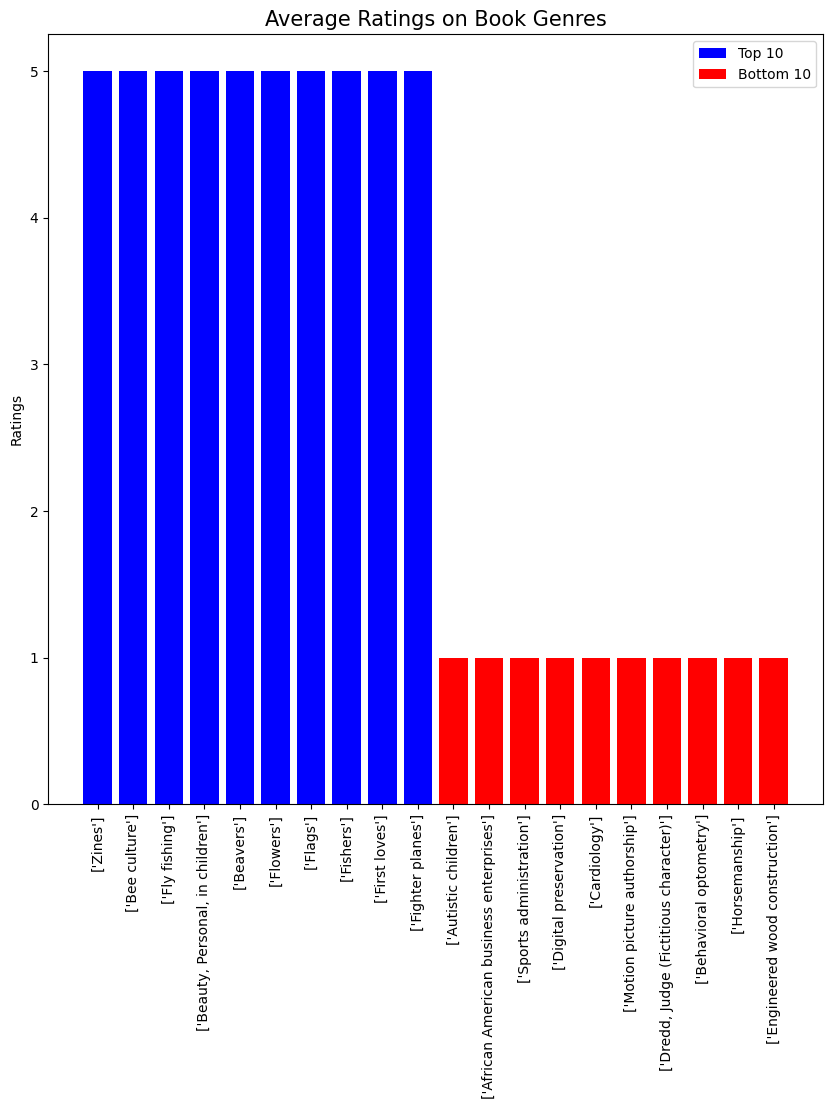

In [16]:
# Convert 'review_score' column to numeric (if applicable)
df['review_score'] = pd.to_numeric(df['review_score'], errors='coerce')

# Filter out non-numeric values (if any)
numeric_data = df.dropna(subset=['review_score'])

# Group by 'categories' and compute the mean of 'review_score'
avg_cat_rating = numeric_data.groupby('categories')['review_score'].mean().sort_values(ascending=False).head(10)
avg_cat_rating_d = numeric_data.groupby('categories')['review_score'].mean().sort_values().head(10)

# Plot the bar chart for top and bottom categories
plt.figure(figsize=(10, 10))
plt.bar(avg_cat_rating.index, avg_cat_rating, color='blue', label='Top 10')
plt.bar(avg_cat_rating_d.index, avg_cat_rating_d, color='red', label='Bottom 10')
plt.title('Average Ratings on Book Genres', fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Ratings')
plt.legend()
plt.show()

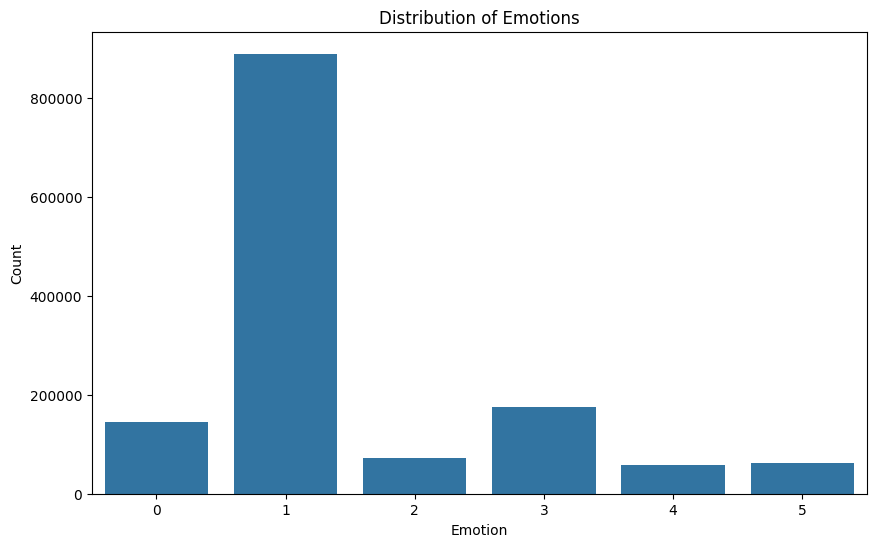

In [18]:
# Visualize distribution of emotions
plt.figure(figsize=(10, 6))
sns.countplot(x='emotions', data=df)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

### 'Joy' has the highest distribution in the category of emotions.

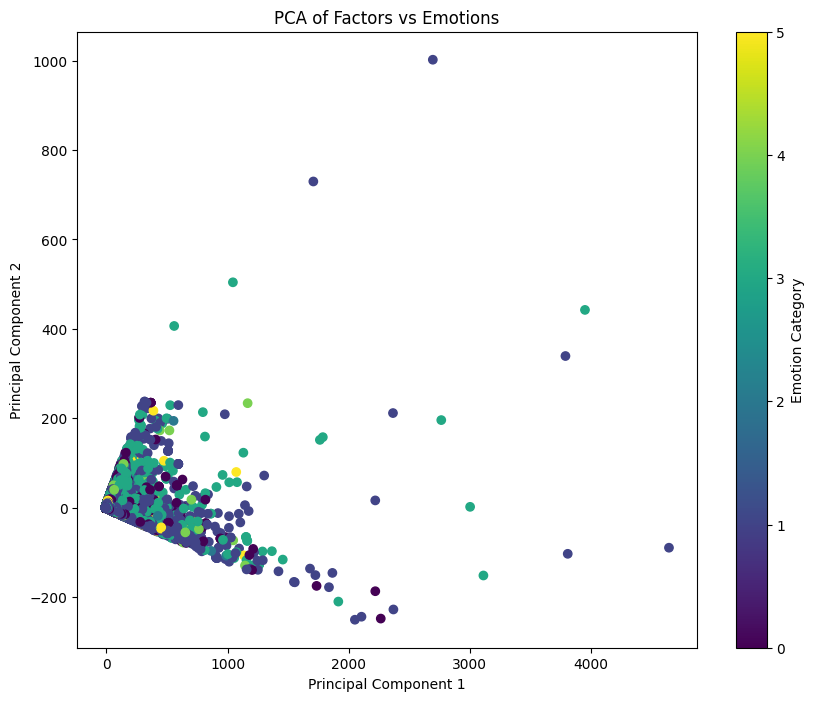

In [7]:
from sklearn.decomposition import PCA
# Extract relevant columns for analysis (features and emotions)
features = df[['useful', 'total_of_person', 'review_score']]  # Adjust based on your dataset
emotions = df['emotions']  # Assuming 'emotions' is your target variable

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
components = pca.fit_transform(features)

# Plot the PCA components against emotions
plt.figure(figsize=(10, 8))
plt.scatter(components[:, 0], components[:, 1], c=emotions, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Factors vs Emotions')
plt.colorbar(label='Emotion Category')
plt.show()